<a href="https://colab.research.google.com/github/sidhusmart/CoRise_Prompt_Design_Course/blob/cohort3/Week_1/CoRise_Week1_StudentVersion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Let's build a product that generate your own customized Podcast


The entire project is divided into the following three steps:

1. Reading the PDF and identifying the key points using an LLM
2. Generating a podcast conversation in various styles that discuss the key themes
3. Giving voice to the podcast and generate the audio
4. Putting all the pieces together to deploy your product


# The Goal

Imagine the possibility of tuning into a podcast that aligns perfectly with your current interests. Picture the joy of listening to a discussion about the world history, despite such a niche topic seemingly not existing in podcast form. What if there was a way to generate a podcast about the latest Large Language Models (LLM) research paper you stumbled upon? And what if this podcast could be tailored to your preferences—perhaps you favor summaries over deep dives, enjoy the occasional witty joke, or prefer listening to guests with deep, soothing voices?

In [ ]:
## Setting up the necessary dependencies
!pip uninstall typing-extensions -y
!pip uninstall gradio -y
!pip install typing_extensions==4.7.1
!pip install gradio
!pip install feedparser
!pip install transformers accelerate
!pip install openai
!pip install tiktoken
!pip install pypdf

Found existing installation: typing_extensions 4.10.0
Uninstalling typing_extensions-4.10.0:
  Successfully uninstalled typing_extensions-4.10.0
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.9/16.9 MB 32.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.1/92.1 kB 8.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 307.9/307.9 kB 22.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 8.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 138.5/138.5 kB 13.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 60.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.8/60.8 kB 6.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.9/129.9 kB 12.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.8/77.8 kB 7.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 6.6 MB/s eta 0:00:00
     

#Section 1: Reading the PDF and identifying the key points using an LLM

One could argue that Large Language Models (LLMs) being world models, they would already have all the information on the topic we care about. But there are some reasons why it still makes sense to consider creating your own text corpus:
1. LLMs typically have a certain cut-off date and are trained on data that is not updated since. Therefore, it's likely that they do not have information about events and developments since that date. They might still be able to generate accurate responses but we can be less confident of their accuracy.
2. There are also data sources that are private (like emails, personal journals, company powerpoints) that LLMs do not have access to but which we would still like to use as the basis for generating a personalized podcast.
3. Using our own text corpus allows us to leverage the technical capabilities of the LLM while bringing our own intelligence, creativity and personal preferences to the task.

In this section, we will read in the content of the PDF and summarize the key highlights of the article/ research paper/ book.

## Reading the PDF and get the contents

This is one of the ways in which we can import knowledge that is typically not indexed by search engines and generally private in nature. During the project kick-off I used an example of the annual report of a company but I'm sure that you will use something that is far more interesting and exciting 😃

We work with PDFs using the pypdf library. Provide the link to the URL to load the PDF.
If you only have a local copy of the PDF, then you can upload it to the Colab environment as shown in the two steps of the screenshot and then use the path of the uploaded file.

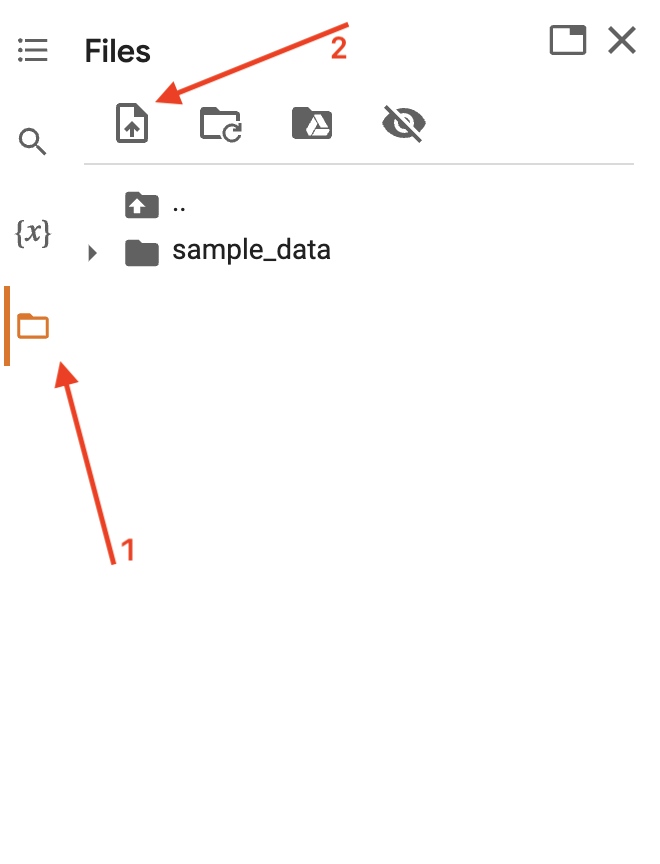

In [ ]:
import requests
import io
from pypdf import PdfReader, PageRange

# # Replace the URL below with the specific PDF URL you want to use
# URL = "YOUR_PDF_SOURCE_URL"
# response = requests.get(URL)
# response.raise_for_status()
# remote_file_bytes = io.BytesIO(response.content)
# reader = PdfReader(remote_file_bytes)

# Uncomment the below line and provide the path to the local PDF file you want to use
reader = PdfReader("/content/Women’s Movement and Feminism in Central Asia.pdf")

# Listing the number of pages in the PDF file
number_of_pages = len(reader.pages)
print (number_of_pages)

10


Depending on the number of pages and structure of your PDF, you may choose to only use a section of it. You can adapt the following code if you would like to pick certain sections of the PDF.

In [ ]:
pages = PageRange('2:10').to_slice()
selected_pages = reader.pages[pages]

# in case you want to use the entire document
# selected_pages = reader.pages

In [ ]:
input_text = ""
for page in selected_pages:
    input_text += page.extract_text() + "\n"

In [ ]:

input_text

"Networking\nand\ncommunication\nseems\nto\nbe\nthe\nmost\neffective\nmeans\nto\nadvance\nWomen's\nsocio-political\nmovement.\nBut\nstill\none\ncould\nask\nwhether\nNet-working\nis\nnot\nsynonymous\nwith\nNot-working?\nThe\nFeminist’ s\nAnti-Feminism\nThe\nWomen's\nmovement\nin\nour\ncountry\nnever\nsaw\nitself\nas\na\nfeminist\nsubject.\nMoreover ,\nrepresented\nby\nurban\neducated\nmiddle\nclass\nwomen\nit\nis\noften\nmet\nwith\nsuspicions\nof\nmale\njournalistic\ncommunity .\nThey\nquestion\nthe\nlegitimacy\nof\nthe\nmovement\non\nbehalf\nof\nan\nhomogeneous\ncommunity\nof\nwomen\nas\nif\nsuch\nsituation\nwas\npossible\nin\nprinciple.\nIn\nthe\nmedia\nand\nin\nthe\npublic\nspace,\nfeminism\ncontinues\nto\nbe\nassociated\nprimarily\nwith\nradical\nfeminism\n.\nWomen's\nproblems\nare\nshown\nmainly\nin\nthe\ncontext\nof\nscarcity ,\ndeprivation,\nvulnerability .\nFeminism\nand\nwomen's\nmovement\nare\nevaluated\nas\na\nnegative\nproblem.\nThe\nlogical\ncircle\ncloses:\nfeminism\nappea

## Understanding Tokens & the Context Window

When working with LLMs, you must remember that each model-type has a restricted **context window**. This is the amount of text that you can use in the prompt for that model-type. For e.g. `text-davinci-003` and `gpt-3.5-turbo` can accept a maximum input of 4096 tokens whereas newer models like `gpt-4` can take upto 32k and even 128k tokens. The pricing of requests to the OpenAI API is also based on the number of tokens, for e.g. `gpt-3.5-turbo` costs $0.002 / 1K tokens.

### But what are tokens?

Tokens are the level at which these LLMs operate. They are trained to predict the next token in order to complete the sentence and so could be viewed as analogous to words. However, this is not completely accurate as tokens can also be parts of words. Let's use the `tiktoken` library from OpenAI to see how an example sentence would be tokenized and also use that to estimate the total number of tokens in our input text.

In [ ]:
import tiktoken
enc = tiktoken.encoding_for_model("gpt-3.5-turbo")
token_list = enc.encode("Tokens are great!")

In [ ]:
token_list

[30400, 527, 2294, 0]

In [ ]:
for token in token_list:
  print ("Token ", str(token), " decodes to ", enc.decode([token]))

Token  30400  decodes to  Tokens
Token  527  decodes to   are
Token  2294  decodes to   great
Token  0  decodes to  !


So we can see that the way OpenAI tokenizes our text is not exactly analogous to words as the word - "CoRise" has been tokenized into three tokens - "Co", "R" & "ise". The way that a model tokenizes our text impacts how many tokens and therefore the length of text that can be accepted in a single API request as well as the pricing -> more token, more the cost!

Let's determine the number of tokens in our text corpus.

In [ ]:
## Please the variable as pdf_input, wiki_input, or book_input based on your choice
print ("Number of tokens in corpus ", len(enc.encode(input_text)))

Number of tokens in corpus  4515


The number of tokens will depend on the type of PDF you chose. Books can be rather large, research papers will have much lesser number of tokens and news articles or reports will be the least. Most certainly you would easily exceed the context window of 4096 tokens for the base model `gpt-3.5-turbo`!



We need to consider that in addition to the input text, we will also have to add the the Prompt that will provide instructions to the LLM. This is not considered a separate field and is counted towards the context window. Therefore, we need to find a way to deal with input texts that exceed the token limit.

What would happen if we do not handle these scenarios - it would result in the tokens at the end of our content being cut-off and not actually sent in the request to the LLM. Depending on the use-case this may or may not have critical implications.

We will design a series of steps that will split the input text into multiple chunks that satisfy the prompt limit. This also means that we will have to make multiple requests to the API and then collate all the responses after all responses have been received.

We will start by splitting the input text into logical sub-parts - sentences with the help of the NLTK library.

In [ ]:
import nltk
nltk.download('punkt')
from nltk.tokenize import sent_tokenize

def split_text (input_text):
  split_texts = sent_tokenize(input_text)
  return split_texts

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Once the entire input text has been broken up into sentences we now join them up in such a way that we create chunks for each prompt. We keep adding sentences to a prompt chunk till we reach the max token length for that prompt. We set the max_token_len = 2000 in this case to ensure that we have enough spare room for our prompt instruction.

In [ ]:
def create_chunks(split_sents, max_token_len=2000):
  current_token_len = 0
  input_chunks = []
  current_chunk = ""
  for sents in split_sents:
    sent_token_len = len(enc.encode(sents))
    if (current_token_len + sent_token_len) > max_token_len:
      input_chunks.append(current_chunk)
      current_chunk = ""
      current_token_len = 0
    current_chunk = current_chunk + sents
    current_token_len = current_token_len + sent_token_len
  if current_chunk != "":
    input_chunks.append(current_chunk)
  return input_chunks

You can try the splitting function on the input text that you have created to see what happens.

In [ ]:
split_sents = split_text(input_text)
input_chunks = create_chunks(split_sents, max_token_len=2000)

In [ ]:
len(input_chunks)

3

Identify how many chunks you have created and ensure that a chunk has not been trimmed at the middle of a sentence. We will move towards the next step of summarizing this information.

## Summarizing the text using an LLM

In this section we will design a prompt for the LLM to take in the input text corpus and create a summary. We do this to identify the key highlights of the chosen topic so that we can subsequently generate the podcast script based on that.

Keep in mind that a generic summary will probably be too short and not have enough context to explore in a podcast discussion.

Please create an account with OpenAI that will allow us to access the API by visiting this [link](https://platform.openai.com) and creating an account with a method of your choice. Once created, please naviagate to the `Manage Accounts` section of your profile and look-up the `Usage` tab. By default, most new accounts automatically get $5 of credit to try the API and this should be enough for the purposes of this project.

Please also visit the `API Keys` tab and Create a new secret key and copy this and keep it available. We will use this API key in subsequent steps while making the API calls.



While we can use the API and make calls directly, it's much easier to work with the Python library provided by OpenAI called - `openai` 🤭. Let's install the package and also test whether it works with our API key.

Once you have copied the API key, please click the Security Key icon on the left hand tab of the Google Colab notebook and then add a new parameter value called `test_new`. Here you can provide the API key that you copied and this will not be part of your Google Colab account. You can also enable the toggle Notebook access - this will allow your notebook to have access to this API key.

In [ ]:
from openai import OpenAI
from google.colab import userdata

client = OpenAI(api_key=userdata.get('test_new'))

**Instructing chatGPT to create a summary from our source text corpus**

We are at the point where we have created chunks for our source text and now it's time to work with `gpt-3.5-turbo` model to generate the summary for our podcast. Please fill in the text prompt below:

- Keep in mind that you don't want just a regular summary - there should be enough information to create a podcast conversation
- Keep in mind that information is returned in a structured way so that you can easily parse and re-use for the next step

**HINT**: You can try and run your prompts first using the [chatGPT Web interface](https://chat.openai.com/) to see how it's working. This is manual because you will have to copy-paste the actual text information but you will save up on the cost of tokens compared to running it via the API.

In [ ]:
instructPrompt = """
Summarize the key points of the Women’s Movement and Feminism in Central Asia, highlighting historical challenges, current issues, and potential strategies for progress. Structure the summary to engage a podcast audience with progressive and anti colonial values and also make it sound casual. Ensure that the summary is insightful, offering listeners clear takeaways and encourages further discussion on effective strategies for advocating women's rights and equality in Central Asia.
"""

In [ ]:
requestMessages = []
for text in input_chunks:
  requestMessage = instructPrompt + '\n' + text
  requestMessages.append(requestMessage)

In [ ]:
chatOutputs = []
for request in requestMessages:
  chatOutput = client.chat.completions.create(model="gpt-3.5-turbo",
                                            messages=[{"role": "system", "content": "You are a helpful assistant."},
                                                      {"role": "user", "content": request}
                                                      ]
                                            )
  chatOutputs.append(chatOutput)

In [ ]:
podcastFacts = ""
for chats in chatOutputs:
  podcastFacts = podcastFacts + chats.choices[0].message.content

In [ ]:
podcastFacts

"In Central Asia, the Women's Movement faces historical challenges and current issues in advocating for gender equality. The movement is often met with suspicion and resistance, especially from the media and society, which tend to associate feminism with radicalism and view women's issues in a negative light, focusing on scarcity and vulnerability. Successful women in business, politics, and the arts are sometimes not identified as feminists, creating a paradox where personal success may not align with collective feminist identity.\n\nThere is a need for greater networking and communication to advance the socio-political movement for women's rights. However, the movement struggles with perceptions of feminism and autonomy, as well as societal norms that perpetuate victim-blaming and marginalize women's issues. In addressing violence against women, it is crucial to dismantle patriarchal structures and fight for all women's rights simultaneously, rather than prioritizing issues in a step

The above output should be a list of all important facts, themes or other highlights from your topic that you would like to be covered in the podcast conversation

# Section 2: Generating a podcast conversation in various styles that discuss the key themes

We have the key highlights/facts from the text corpus. We would like to weave a podcast conversation around this and generate a podcast script.

You can be as creative as you like and come up with various conversation styles that you would like to offer to customers. Here are some options that you can use when constructing your prompt -  
- Introduce the speakers - give them names (celebrities perhaps?)
- Would you like to assign a personality to your speakers? Include details when setting the context in your prompt
- Add some information to have a gentle introduction - maybe an ice-breaker?
- Then provide instructions for how the conversation should proceed - who asks the questions, how does the other speaker respond?
- Keep in mind that you will use this output in the next step to generate voices, so have a way to identify the different speakers in the conversation

We have included one example in this notebook already and provided additional examples of conversational styles in the course material as inspiration and look forward to seeing what other styles you come up with!

**Helpful Hints**

- In order to avoid using up a lot of your tokens it makes sense to start with only one chunk at a time and run experiments with your prompt. Once satisfied with the outcomes, then extend this to include all the chunks.
- Remember that in the next section, you are going to use a method to generate voices for the generated script. Therefore you should have a way to identify the speaker of each line of text so that you can generate the voice easily.

In [ ]:
podcast_prompt_style1 = """
Could you simulate a podcast conversation between \"Aisulu\" and \"AI\" having a conversation about the following facts?
Some things I'd like to ask:
  - Use \"Aisulu:\" and \"AI:\" to indicate who is speaking.
  - Start the dialog with a casual discussion on where each person is from. AI lives in Almaty and Aisulu is currently in the US.
  - Make the dialog about this as long as possible and make it sound thought provoking and engaging.
  - Aisulu is the one presenting the information, AI is asking intelligent questions that help elaborate the facts.
Here's some of the facts from the topic. \"Aisulu\" and \"AI\" are feminists in a culture that is not aware of Kazakhstan and its feminist community. They want to tell the world and create a true representation.
"""

In [ ]:
podcast_prompt_style2 = """
YOUR_PROMPT_HERE
"""

In [ ]:
podcast_prompt_style3 = """
YOUR_PROMPT_HERE
"""

In [ ]:
requestMessage = podcast_prompt_style1 + podcastFacts
requestMessage

'\nCould you simulate a podcast conversation between "Aisulu" and "AI" having a conversation about the following facts?\nSome things I\'d like to ask:\n  - Use "Aisulu:" and "AI:" to indicate who is speaking.\n  - Start the dialog with a casual discussion on where each person is from. AI lives in Almaty and Aisulu is currently in the US.\n  - Make the dialog about this as long as possible and make it sound thought provoking and engaging.\n  - Aisulu is the one presenting the information, AI is asking intelligent questions that help Sid elaborate the facts.\nHere\'s some of the facts from the topic. "Aisulu" and "AI" are feminists in a culture that is not aware of Kazakhstan and its feminist community. They want to tell the world and create a true representation.\nIn Central Asia, the Women\'s Movement faces historical challenges and current issues in advocating for gender equality. The movement is often met with suspicion and resistance, especially from the media and society, which ten

In [ ]:
finalOutput = client.chat.completions.create(model="gpt-3.5-turbo",
                                            messages=[{"role": "system", "content": "You are a helpful assistant."},
                                                      {"role": "user", "content": requestMessage}
                                                      ]
                                            )

In [ ]:
podcastScript = finalOutput.choices[0].message.content

In [ ]:
print (podcastScript)

Aisulu: Hey there, AI! It's great to be chatting with you today about the Women's Movement and Feminism in Central Asia. I'm currently in the US, but I'm really passionate about shedding light on the feminist community in Kazakhstan.

AI: Hello, Aisulu! I'm excited to delve into this important topic with you. So, tell me a bit about the challenges that the Women's Movement faces in Kazakhstan and other Central Asian countries.

Aisulu: Well, the Women's Movement in Central Asia encounters historical challenges and contemporary issues in advocating for gender equality. One major hurdle is the negative association of feminism with radicalism in society and the media. This often leads to resistance and suspicion towards feminist initiatives.

AI: That's fascinating. It seems like there's a paradox where successful women are not always identified as feminists, creating a disconnect between personal achievements and collective feminist identity. How does this impact the movement?

Aisulu: E

Check the output script that your prompt generated and make necessary changes if required. Prompt design is iterative in nature and don't be shy to explore different styles.

# Section 3 - Giving voice to the podcast and generate the audio

Since November 2023, OpenAI offers a voice generation API although there are only 6 voices at the moment and the voice generation works best for English although others are also supported. We will use this API to keep things simple but do look for the Extensions at the end of the notebook where we provide additional information on using ElevenLabs - where you will be able to select from a large variety of speakers and even train your own!

In order to perform the voice generation, we use the following two methods. The `openai_generation` function makes the call to the API to generate voice from a piece of text. The `createPodcast` function takes as input the podcastScript and makes necessary adjustment of speaker names and selected voices to generate and stitch together the complete podcast.

This function assumes that each line of the input text is spoken by a different person and the person's name is also part of the text itself. Please ensure that the prompt and outputs of the podcast script (generated in the previous step) fits this style.

In [ ]:
def openai_generation(input_text, speaker_voice, model_choice="tts-1"):
  client = OpenAI(api_key=userdata.get('test_new'))
  response = client.audio.speech.create(
      model=model_choice,
      voice=speaker_voice,
      input=input_text
  )
  return response.read()

In [ ]:
def createPodcast(podcastScript, speakerName1, speakerChoice1, speakerName2, speakerChoice2):
  genPodcast = []
  podcastLines = podcastScript.split('\n\n')
  podcastLineNumber = 0
  for line in podcastLines:
    if podcastLineNumber % 2 == 0:
      speakerChoice = speakerChoice1
      line = line.replace(speakerName1+":", '')
    else:
      speakerChoice = speakerChoice2
      line = line.replace(speakerName2+":", '')
    genVoice = openai_generation(input_text=line, speaker_voice=speakerChoice, model_choice="tts-1")
    genPodcast.append(genVoice)
    podcastLineNumber += 1
  return genPodcast

OpenAI currently only supports six speaker voices and you can choose the type of voice that you would like by listening to some of the samples [here](https://platform.openai.com/docs/guides/text-to-speech/voice-options).

Once you have selected the speaker voices then please make changes below to specify the name of the speakers you chose while generating the podcast script. This will ensure those names are actually removed before the dialogue is spoken!

In [ ]:
speakerName1 = "Aisulu"
speakerChoice1 = "shimmer"
speakerName2 = "AI"
speakerChoice2 = "alloy"
genPodcast = createPodcast(podcastScript, speakerName1, speakerChoice1, speakerName2, speakerChoice2)

In [ ]:
with open("/content/genPodcast.mp3", "wb") as f:
  for pod in genPodcast:
    f.write(pod)

With the previous step, you will find the generated podcast available in the folder section on the left bar of Google Colab (refer to the screenshot where you uploaded the PDF file).

Next step will be to deploy the podcast in production. Follow notebook `product_podcust.ipynb`